In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

In [ ]:
data = pd.read_csv('train_data.csv', sep = ',')
data.head()

,size,price
0,1600,329900
1,2400,369000
2,1416,232000
3,3000,539900
4,1985,299900


In [ ]:
data.describe()

,size,price
count,46.000000,46.000000
mean,1998.434783,339119.456522
std,803.333019,126103.418369
min,852.000000,169900.000000
25%,1429.500000,249900.000000
50%,1870.000000,299900.000000
75%,2284.500000,368875.000000
max,4478.000000,699900.000000


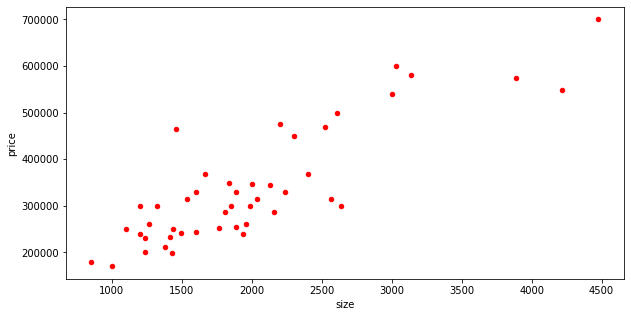

In [ ]:
data.plot(kind='scatter', x='size', y='price', figsize=(10,5),color='red')

# Feature scaling
We can speed up gradient descent by having each of our input values in roughly the same range. This is because θ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.
>
The way to prevent this is to modify the ranges of our input variables so that they are all roughly the same. Ideally:
>
      −1 ≤ x≤ 1

> 


These aren’t exact requirements; we are only trying to speed things up. The goal is to get all input variables into roughly one of these ranges, give or take a few.
> 
Two techniques to help with this are **feature scaling and mean normalization**. Feature scaling involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable, resulting in a new range of just 1. Mean normalization involves subtracting the average value for an input variable from the values for that input variable resulting in a new average value for the input variable of just zero. To implement both of these techniques, adjust your input values as shown in this formula:
                                                  
![alt text](https://miro.medium.com/max/143/1*WHNo6emX78_Ff9s7ahh2Eg.png)


In [ ]:
data = (data - np.mean(data))/np.std(data)

In [ ]:
data.describe() #after normalize the inputs

,size,price
count,4.600000e+01,4.600000e+01
mean,-1.303305e-16,-3.620292e-17
std,1.011050e+00,1.011050e+00
min,-1.442867e+00,-1.356738e+00
25%,-7.160437e-01,-7.153282e-01
50%,-1.616440e-01,-3.144469e-01
75%,3.600328e-01,2.385688e-01
max,3.120704e+00,2.892604e+00


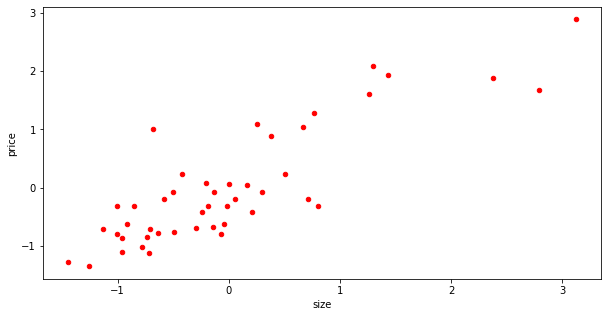

In [ ]:
data.plot(kind='scatter', x='size', y='price', figsize=(10,5),color='red')

In [ ]:
#theta = np.matrix(np.array([0,0]))
theta=np.random.randn(1,2)

### Inserting a Column of ones
since the theta(parameters) has 2 elements we can obtain hypothesis function simply by dot product between input
and theta if we insert a column of ones so that theta[0] * 1 = theta[0] only [we use it inside computecost funtion only]
.Hence the dot product will compute (theta[0] * 1 + theta[1]*data['x']) which is a required hypothesis function

In [ ]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,size,price
0,1,-0.501458,-0.073918
1,1,0.505398,0.239571
2,1,-0.733034,-0.858844
3,1,1.260539,1.609783
4,1,-0.016909,-0.314447


In [ ]:
X=data.iloc[:,0:2]
X.head()

,Ones,size
0,1,-0.501458
1,1,0.505398
2,1,-0.733034
3,1,1.260539
4,1,-0.016909


In [ ]:
y=data['price']
y.head(),y.shape

(0   -0.073918
 1    0.239571
 2   -0.858844
 3    1.609783
 4   -0.314447
 Name: price, dtype: float64, (46,))

In [ ]:
x = np.matrix(X)
y = np.matrix(y)
y=y.T

In [ ]:
x.shape, theta.shape, y.shape

((46, 2), (1, 2), (46, 1))

In [ ]:
theta

array([[-1.29861763,  0.62316596]])

In [ ]:
def computeCost(x, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m , n+1) <Here n is 1 and we added one more column of ones>, where m is the number of examples,
        and n is the number of features. <Hence the dimension is (46,2)
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, 1).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (1,n+1 ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m =46  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
   
    h = np.matmul(x, theta.T)
    
    J = (1/(2 * m)) * np.sum(np.square(h - y))
    
   
    return J

In [ ]:
computeCost(x,y,theta)


1.0039864259408737

In [ ]:
#gradient descent is used to minimize the error
num_iters=250
new_theta, cost = gradientDescent(x, y, theta,num_iters, lr=0.1)
print(new_theta, cost)

[[-4.72174170e-12  8.55928253e-01]] [0.83863075 0.70469266 0.5962028  0.50832602 0.43714582 0.37948987
 0.33278854 0.29496047 0.26431973 0.23950073 0.21939734 0.20311359
 0.18992376 0.17923999 0.17058614 0.16357652 0.15789873 0.15329972
 0.14957452 0.14655711 0.14411301 0.14213329 0.14052971 0.13923081
 0.13817871 0.1373265  0.13663621 0.13607708 0.13562419 0.13525734
 0.13496019 0.1347195  0.13452455 0.13436663 0.13423872 0.13413511
 0.13405119 0.13398321 0.13392815 0.13388355 0.13384742 0.13381816
 0.13379446 0.13377526 0.13375971 0.13374711 0.13373691 0.13372865
 0.13372195 0.13371653 0.13371214 0.13370858 0.1337057  0.13370336
 0.13370147 0.13369994 0.1336987  0.1336977  0.13369688 0.13369622
 0.13369569 0.13369526 0.13369491 0.13369462 0.13369439 0.13369421
 0.13369406 0.13369393 0.13369383 0.13369375 0.13369369 0.13369364
 0.13369359 0.13369356 0.13369353 0.13369351 0.13369349 0.13369348
 0.13369346 0.13369345 0.13369345 0.13369344 0.13369343 0.13369343
 0.13369343 0.13369342 0.1

In [ ]:
theta

array([[-1.29861763,  0.62316596]])

In [ ]:
Model_price = new_theta[0, 0] + (new_theta[0, 1] * x) 

Text(0.5, 1.0, 'Predicted Price vs. Size')

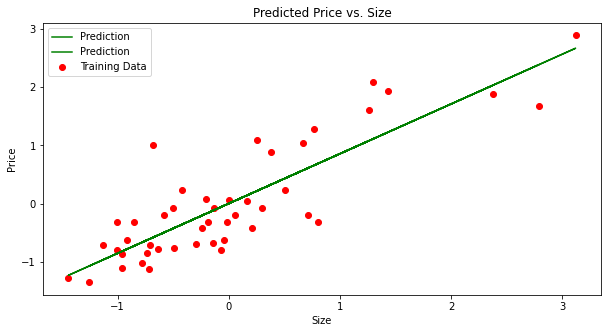

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, Model_price, 'r', label='Prediction',color='green')
ax.scatter(data['size'],data.price, label='Training Data',color='red')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Predicted Price vs. Size')

Text(0.5, 1.0, 'MSE vs. Iterations')

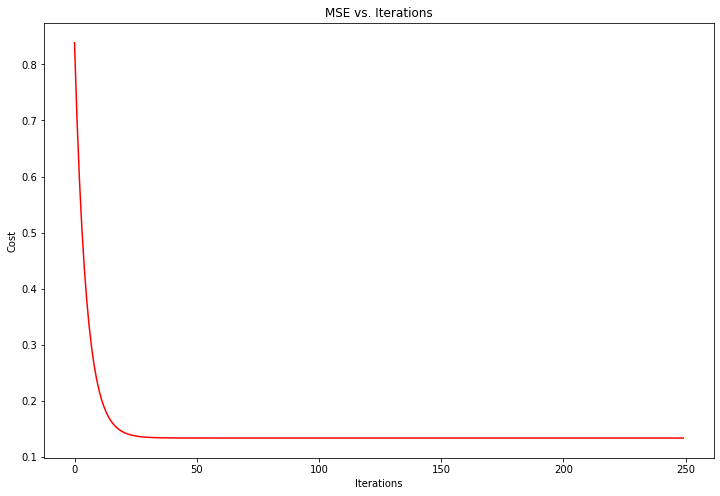

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(num_iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('MSE vs. Iterations')

## Problem  of Overshooting

In [ ]:
# num_iters=250
# new_theta, cost = gradientDescent(x, y, theta,num_iters, lr=2.1)
# print(new_theta, cost)

In [ ]:
# fig, ax = plt.subplots(figsize=(12,8))
# ax.plot(np.arange(num_iters), cost, 'r')
# ax.set_xlabel('Iterations')
# ax.set_ylabel('Cost')
# ax.set_title('MSE vs. Iterations')

In [ ]:
theta,new_theta

(array([[-1.29861763,  0.62316596]]),
 matrix([[-2.89502676e+10, -5.18900291e+09]]))